MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
TARGET        0
dtype: int64
Mean Squared Error: 0.5558915986952443
R-squared: 0.5757877060324508


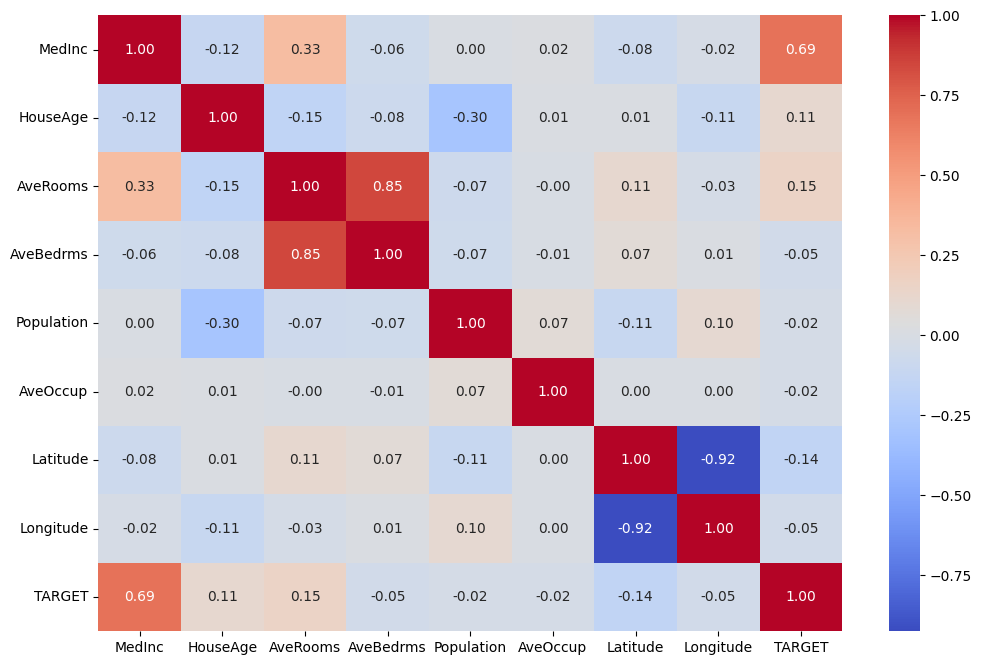

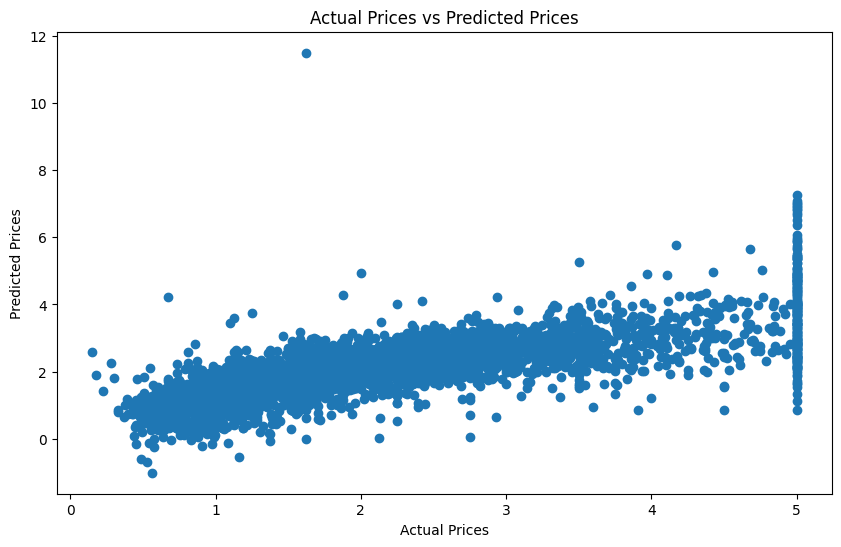

Enter values for the following features:


Enter value for MedInc:  12345
Enter value for HouseAge:  12345
Enter value for AveRooms:  12
Enter value for AveBedrms:  23
Enter value for Population:  1
Enter value for AveOccup:  1
Enter value for Latitude:  1
Enter value for Longitude:  1


The predicted house price is: $5637589.87


/home/abhishek.anand/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np  # Numerical operations
import pandas as pd  # Data handling and manipulation
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting graphs
from sklearn.datasets import fetch_california_housing  # Importing dataset
from sklearn.model_selection import train_test_split  # Splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# ----- Data Collection: Gathering the data that will be used to train the model -----
# Loading the California housing dataset from scikit-learn
california_housing = fetch_california_housing()

# Convert the dataset into a pandas DataFrame for easier data manipulation and analysis
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['TARGET'] = california_housing.target  # Adding the target variable (house prices) to the dataframe

# Display the first few rows of the dataset to get an overview of the data
df.head()

# ----- Data Preprocessing: Cleaning the data by handling missing values, encoding categorical variables, normalizing features, etc. -----
# Checking for missing values in the dataset (we ensure there are no missing values in this dataset)
print(df.isnull().sum())  # No missing values in this dataset

# Visualizing the correlation between the features and the target variable (house prices) using a heatmap
plt.figure(figsize=(12,8))  # Setting the figure size for the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Plotting the correlation heatmap

# ----- Feature Selection/Engineering: Identifying which features (columns) are most relevant to the model and creating new features if necessary -----
# In this case, we already have relevant features, and we don't need to create any new ones.
# We'll use all the features available for training the model.

# ----- Model Selection: Choosing the appropriate machine learning algorithm based on the problem type (regression in this case) -----
# Here, we select Linear Regression as the model because we are performing a regression task (predicting continuous values)
model = LinearRegression()  # Initializing the linear regression model

# ----- Data Splitting: Splitting data into training and testing sets -----
X = df.drop('TARGET', axis=1)  # Features: Dropping the target column to get the features
y = df['TARGET']  # Target: The house price values we are trying to predict

# Splitting the dataset into 80% training data and 20% testing data to train and evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Training the Model: Training the model on the prepared dataset -----
# Training the model using the training data (X_train, y_train)
model.fit(X_train, y_train)

# ----- Model Evaluation: Evaluating the model's performance using metrics like RMSE, R-squared, etc. -----
# Making predictions on the test data (X_test) using the trained model
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE), which indicates how well the model’s predictions align with the true values
mse = mean_squared_error(y_test, y_pred)

# Calculating the R-squared value, which measures how well the model explains the variance in the target variable
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics to assess the performance of the model
print(f"Mean Squared Error: {mse}")  # A lower MSE indicates better model performance
print(f"R-squared: {r2}")  # R-squared closer to 1 indicates better performance

# ----- Hyperparameter Tuning: Adjusting the model’s hyperparameters to improve performance -----
# Currently, we're using the default hyperparameters of the LinearRegression model.
# In more complex models, you could tune hyperparameters to improve the model's performance.
# However, linear regression is simple and typically doesn't require hyperparameter tuning.

# ----- Deployment: Deploying the model into a production environment where it can make real-time predictions -----
# Once the model is trained and tested, it can be deployed to make predictions on new data in production.
# Deployment can be done by saving the trained model and using it for real-time predictions.
# Example: Saving the model using joblib to be used in a production environment
# import joblib
# joblib.dump(model, 'house_price_model.pkl')  # Save the model as a pickle file

# ----- Monitoring and Maintenance: Continuously monitoring the model’s performance and retraining when necessary -----
# In production, it's crucial to monitor the model's performance to ensure it continues to make accurate predictions.
# If the model's performance starts to degrade (e.g., due to changes in data patterns), it should be retrained with new data.
# This step usually involves setting up a monitoring system in production that tracks the model’s performance over time.

# ----- Visualization: Visualizing the predictions vs actual values -----
# Plotting a scatter plot to compare the actual house prices (y_test) with the predicted prices (y_pred)
plt.figure(figsize=(10,6))  # Setting the figure size for the plot
plt.scatter(y_test, y_pred)  # Scatter plot of actual vs predicted prices
plt.xlabel('Actual Prices')  # Labeling the x-axis
plt.ylabel('Predicted Prices')  # Labeling the y-axis
plt.title('Actual Prices vs Predicted Prices')  # Setting the title of the plot
plt.show()  # Display the plot


# ----- Input for Prediction: Allowing user input for predictions -----
# Function to allow user input for predictions
def predict_house_price():
    print("Enter values for the following features:")

    input_features = []
    for feature in california_housing.feature_names:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                input_features.append(value)
                break  # Exit loop when valid input is given
            except ValueError:
                print(f"Invalid input. Please enter a numerical value for {feature}.")

    # Convert the input list to a numpy array and reshape it to match the model input format
    input_array = np.array(input_features).reshape(1, -1)

    # Making a prediction based on the input features
    predicted_price = model.predict(input_array)
    print(f"The predicted house price is: ${predicted_price[0]*1000:.2f}")  # Multiply by 1000 to get the price in dollars

# Calling the function to get user input and make the prediction
predict_house_price()
